In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
import scipy as scp
from statsmodels.tsa.ar_model import AutoReg
from itertools import product
from pylab import rcParams
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
our_columns = ['icethic_cea', 'iceconc','uice_ipa', 'vice_ipa','snowthic_cea']
df = pd.read_csv('arctic_results/ts_features.csv', header = None)
df.columns = our_columns
times = pd.date_range('2012-01-01', periods=len(df.index), freq='1h')
df.index = times

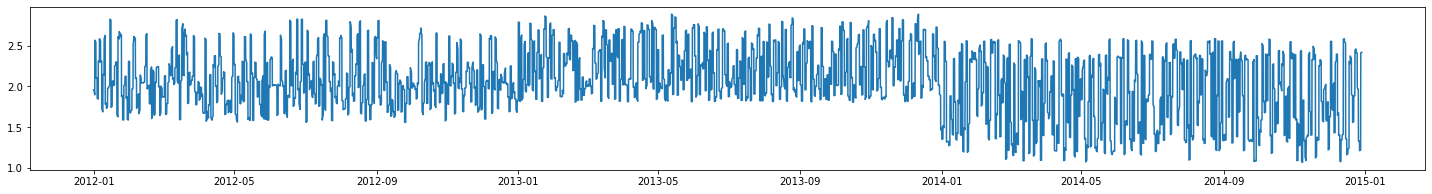

In [8]:
our_data = df['icethic_cea']
plt.subplots(figsize=(25, 3))
plt.plot(our_data)
plt.show()

In [11]:
df['dt']=df.index.dt.round('1d')
our_data.groupby('dt').agg("mean")

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [10]:
our_data.shape

(26232,)

<Figure size 432x288 with 0 Axes>

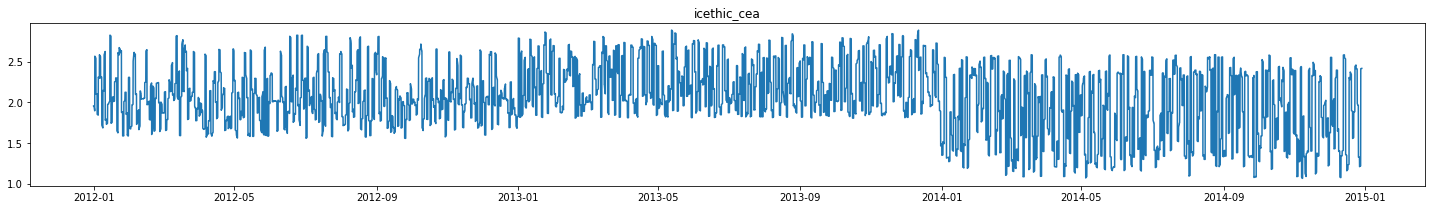

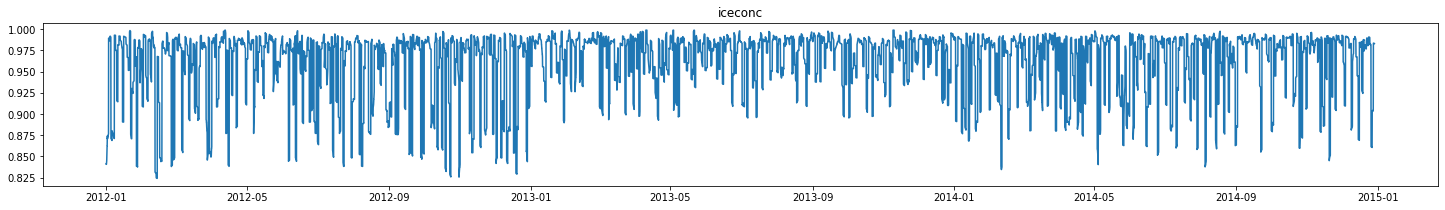

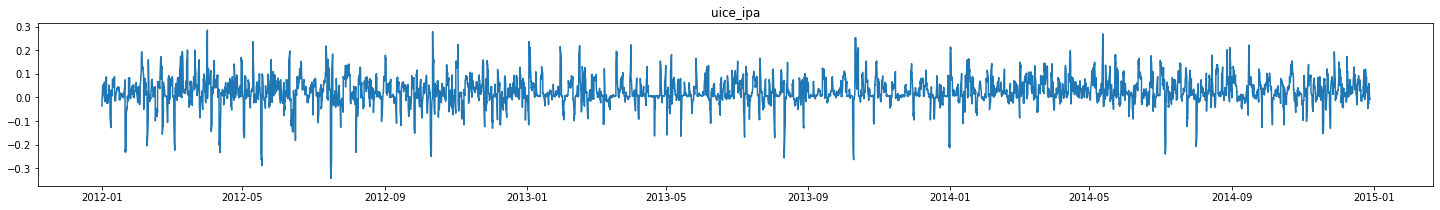

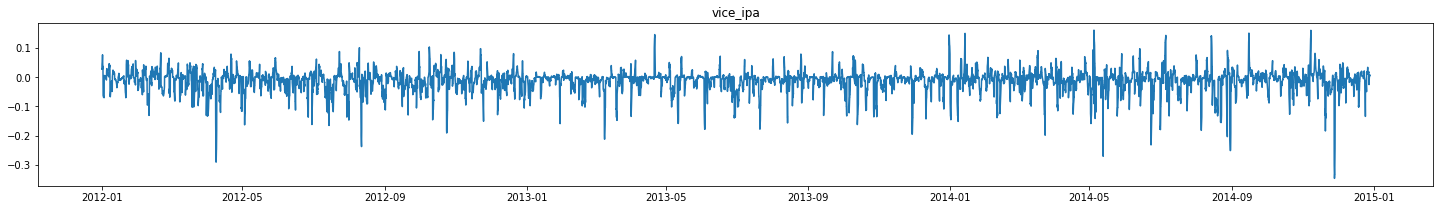

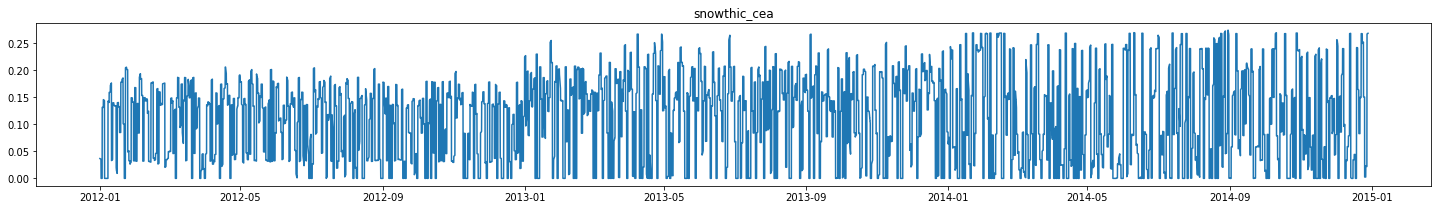

In [12]:
plt.figure()
for column in df.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df[column])
    plt.title(column)
    plt.show()

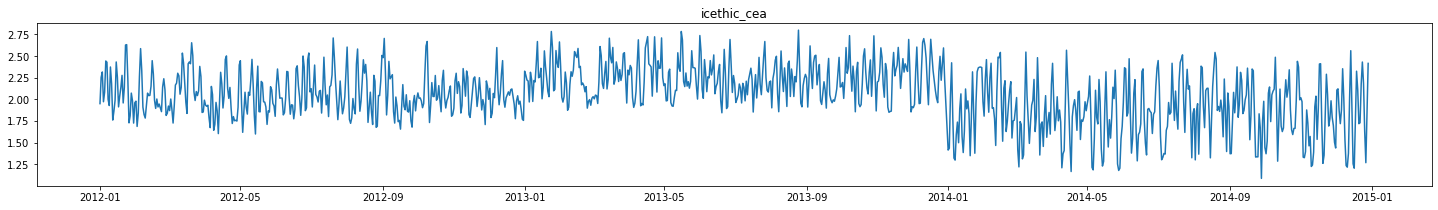

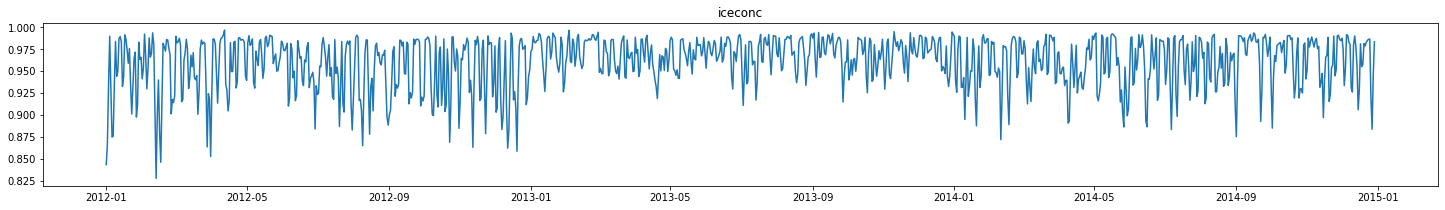

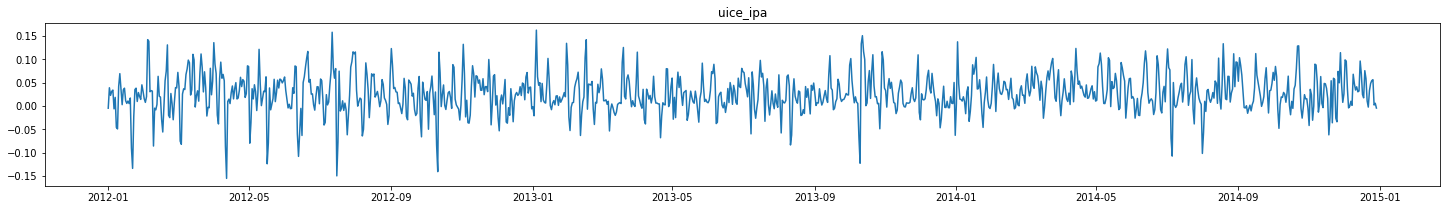

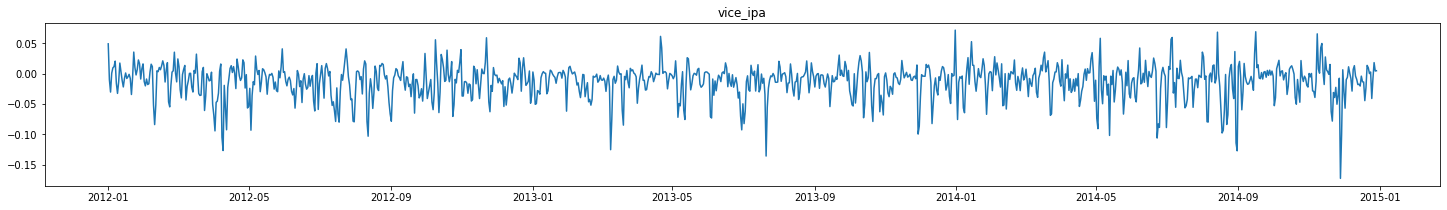

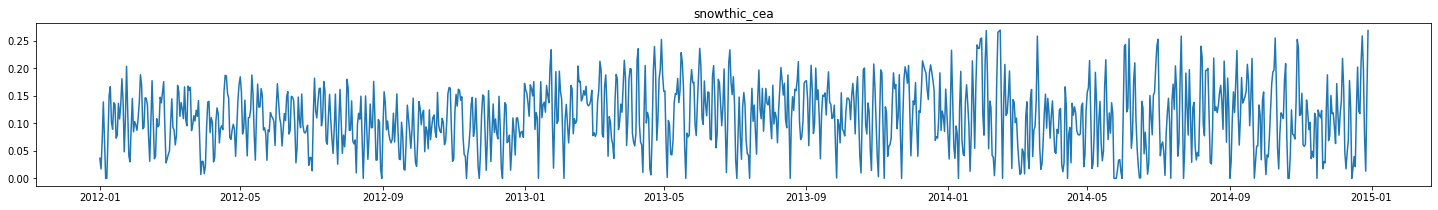

In [15]:
df['dt'] = df.index
df['dt']=df['dt'].dt.round('1d')
dc = {column: 'mean' for column in our_columns}
df_daily = df.groupby('dt').agg(dc)
for column in df_daily.columns:
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column])
    plt.title(column)
    plt.show()

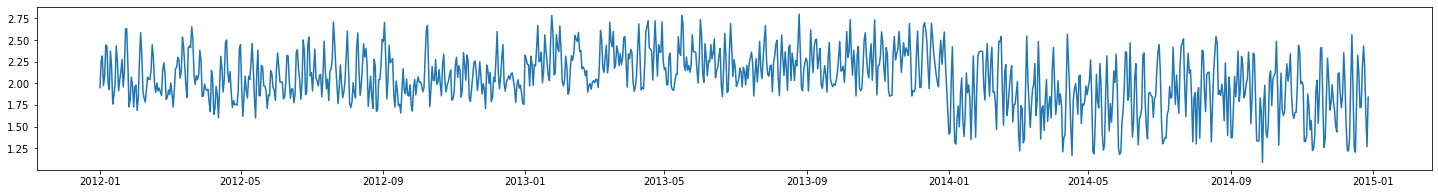

In [18]:
our_data = df_daily['icethic_cea'][:-1]
plt.subplots(figsize=(25, 3))
plt.plot(our_data)
plt.show()

In [19]:
our_data.shape 

(1093,)

In [24]:
start_idx = 0
n = (our_data.shape[0] - 1) // 2
mtrx = []
for i in range(n):
    mtrx.append(our_data[start_idx:start_idx + n])
    start_idx += 1

mtrx = np.array(mtrx)

2.253466787545577 2.253466787545577


In [26]:
def stat_tests(data):
    # Dickey-Fuller test
    result = adfuller(data, autolag='AIC')

    if result[1] > 0.05:
        answer = 'Series is not Stationary'
    else:
        answer = 'Series is Stationary'

    print(f'ADF Statistic: {round(result[0],3)}'), print(f'p-value: {round(result[1],4)}'), print(answer)
    

ADF Statistic: -8.939
p-value: 0.0
Series is Stationary
None


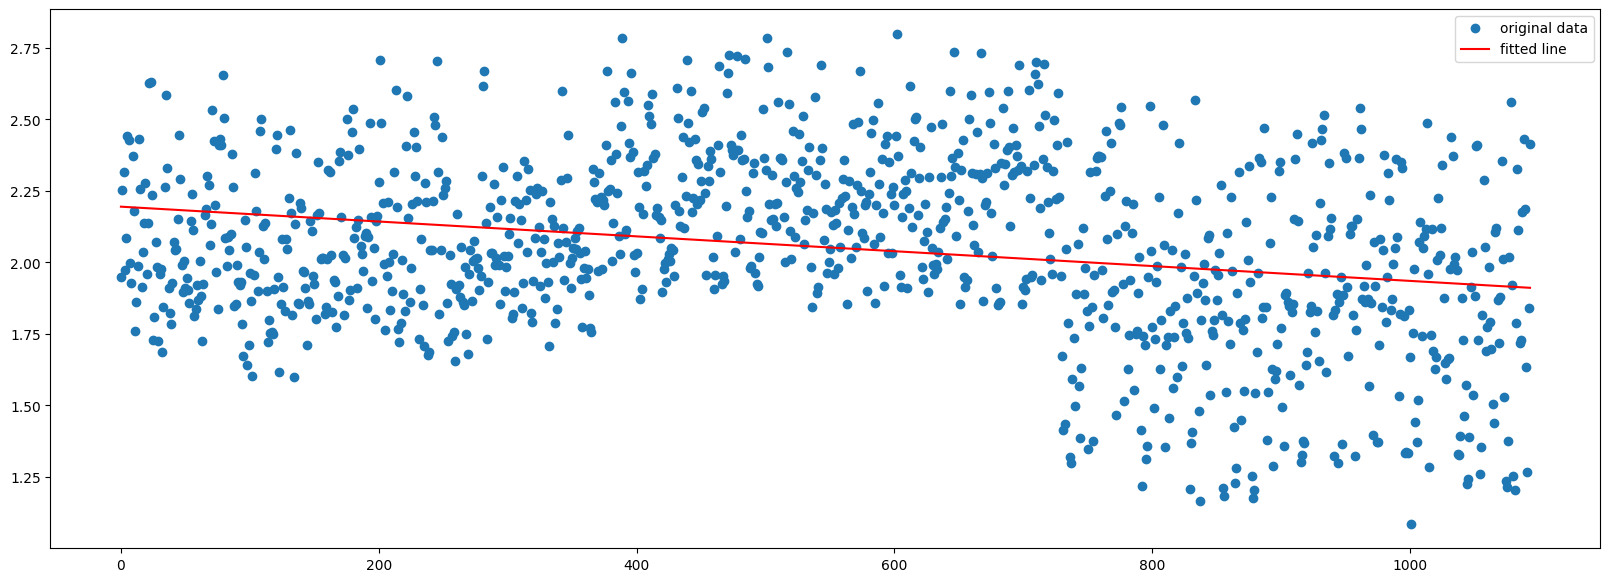

In [27]:
y = df_daily['icethic_cea']
x = np.array([x for x in range(len(y.values))])
lin_reg = scp.stats.linregress(x,y)
statistics = stat_tests(x)
print(statistics)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

ADF Statistic: -4.031
p-value: 0.0013
Series is Stationary
None


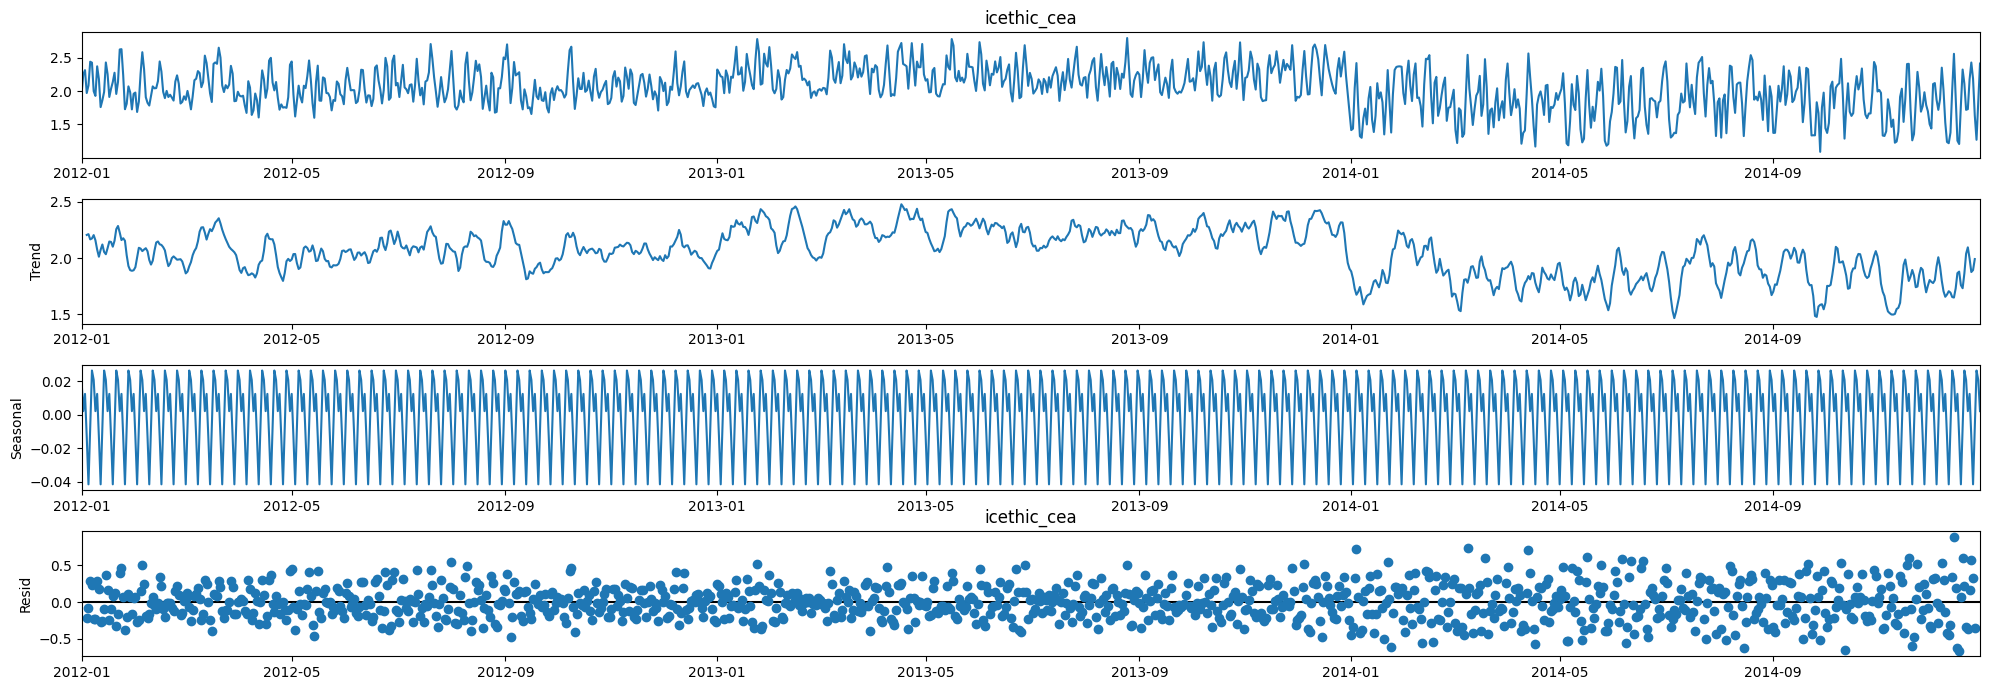

ADF Statistic: -4.406
p-value: 0.0003
Series is Stationary
None


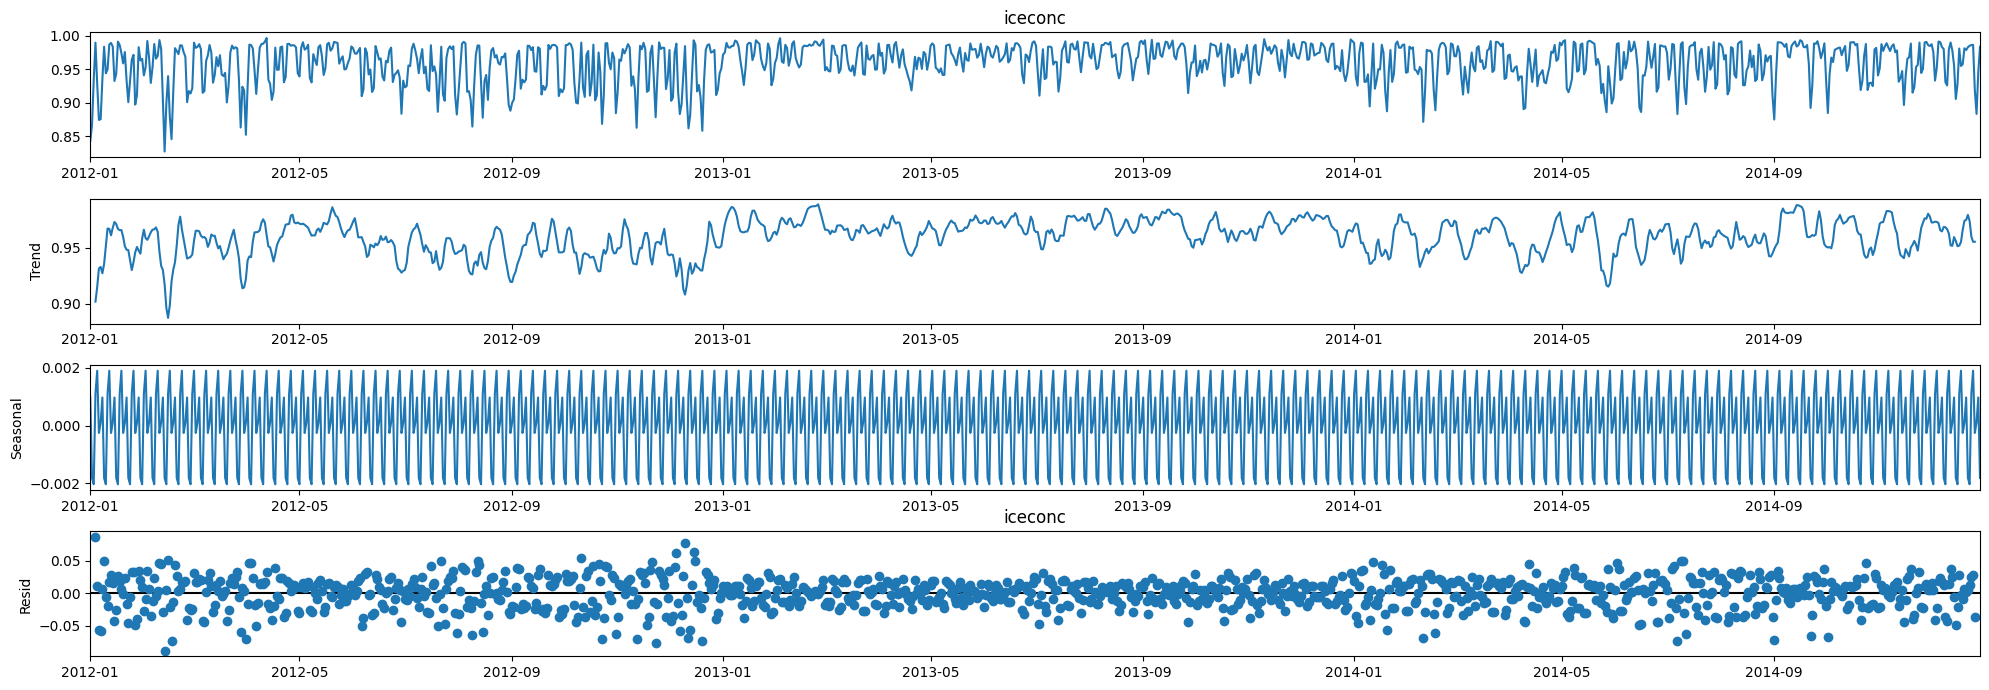

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


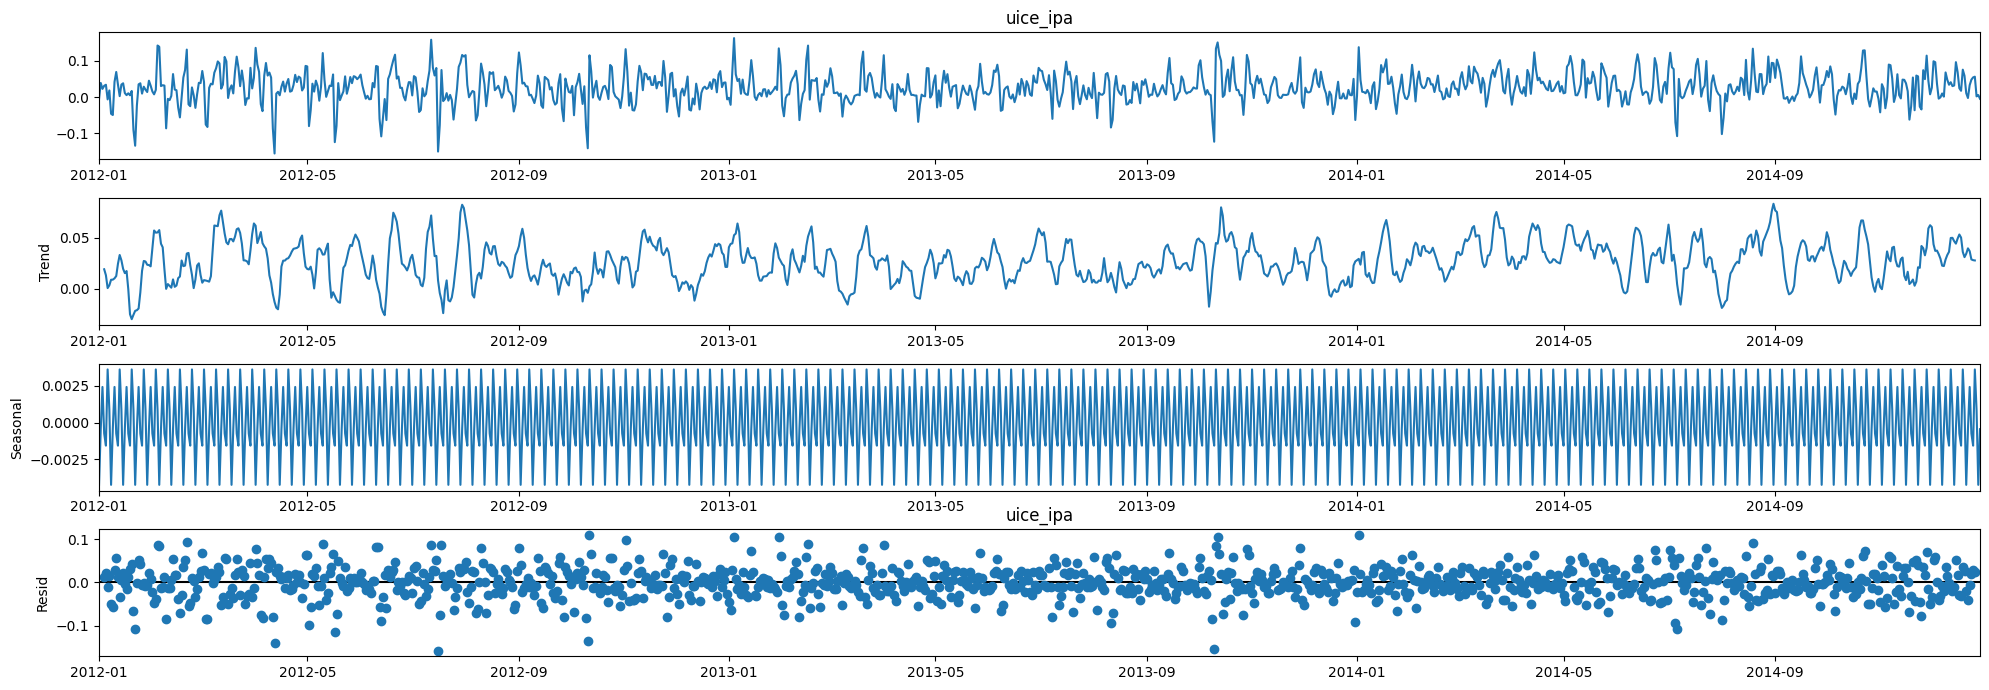

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


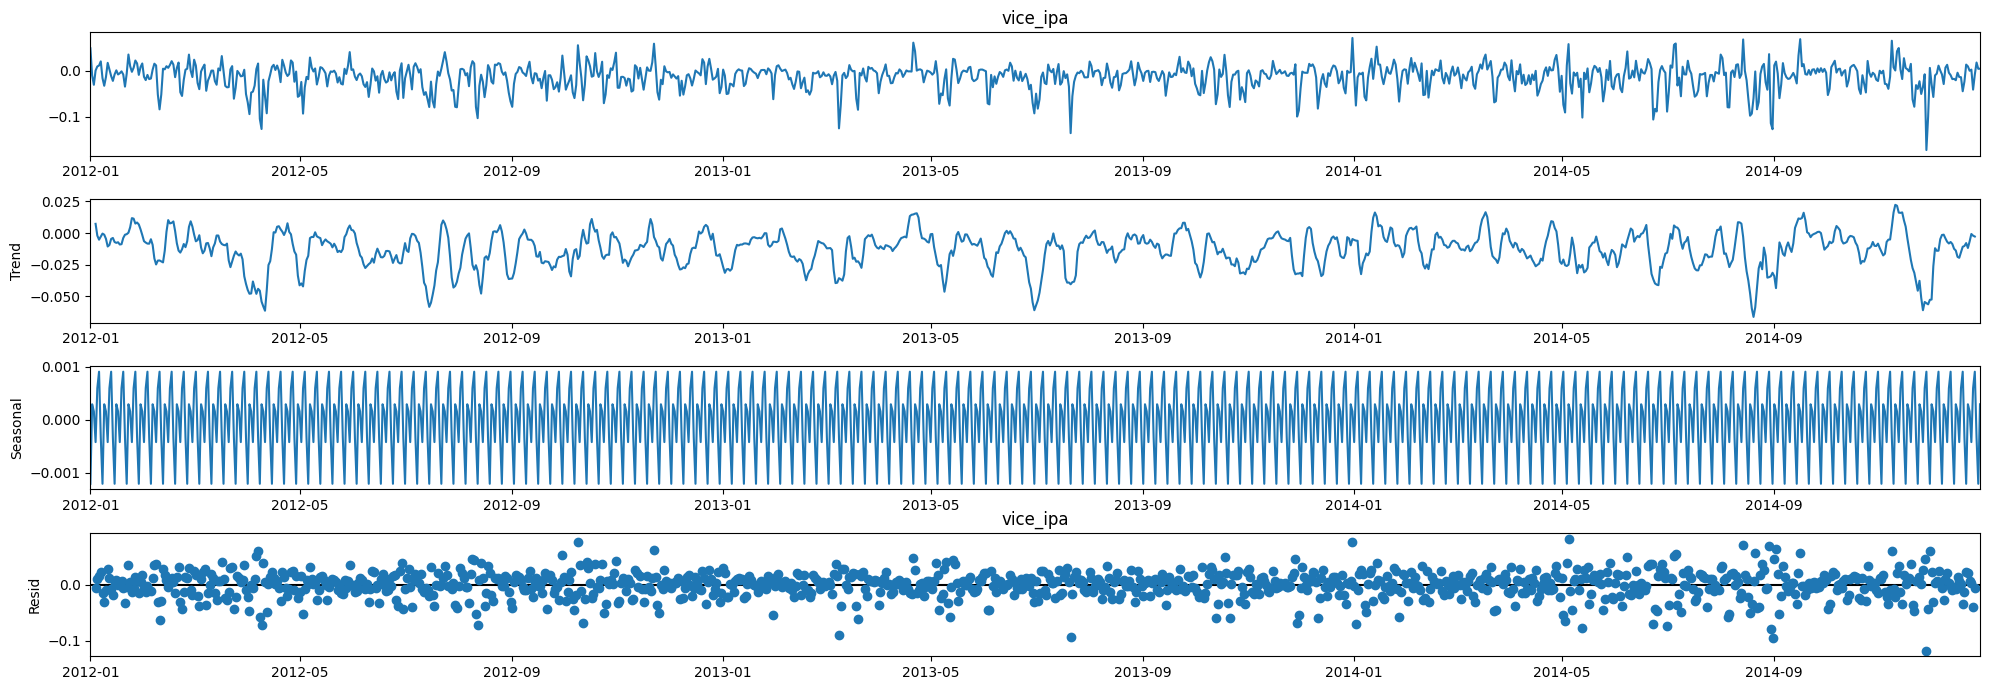

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


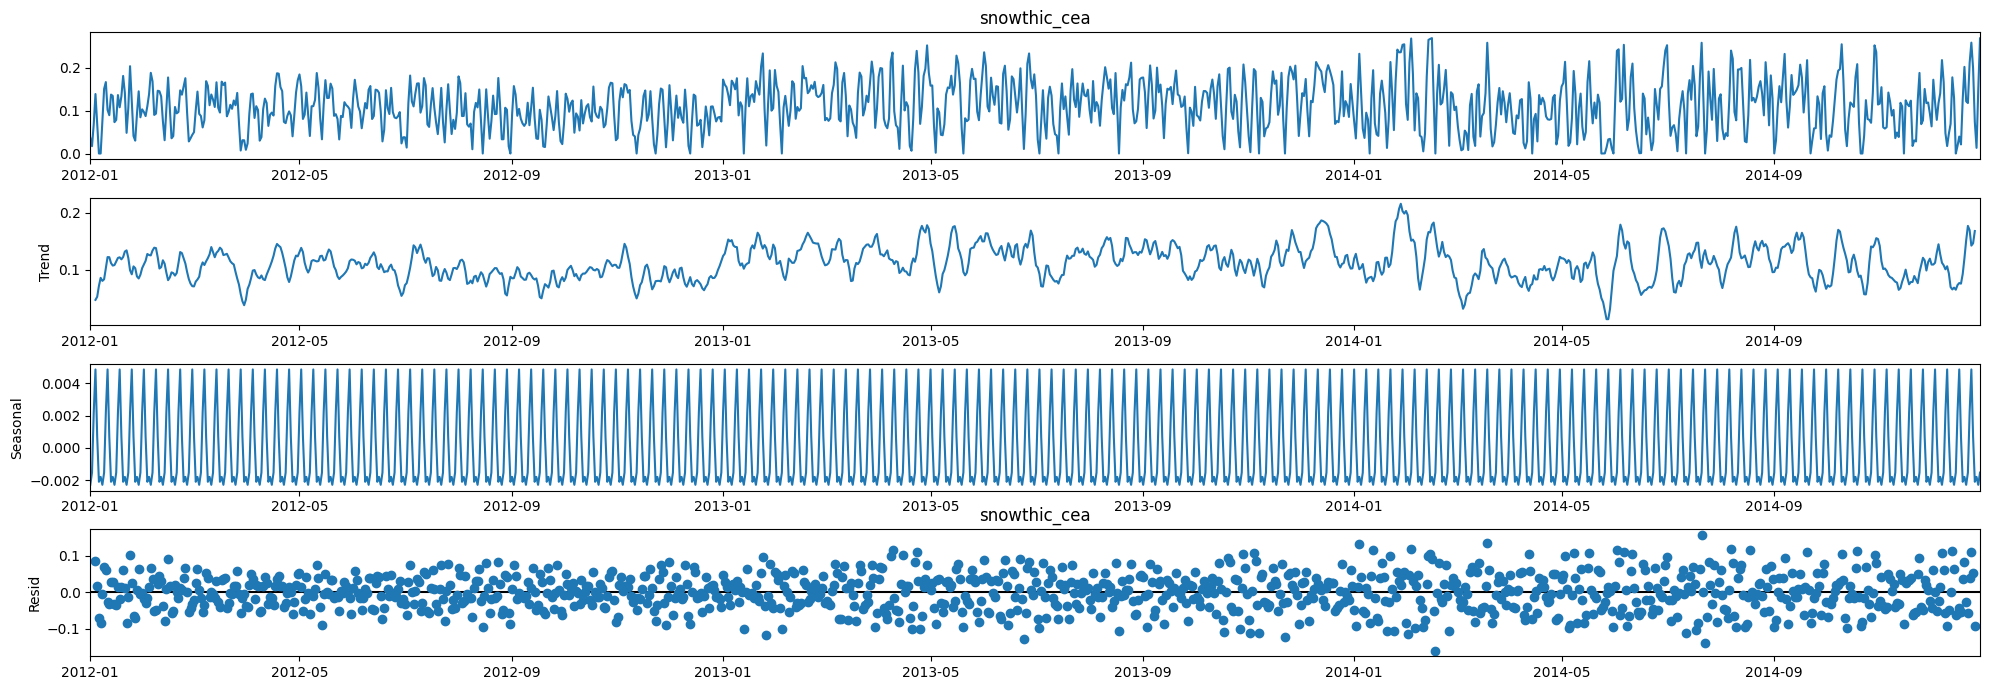

In [28]:
rcParams['figure.figsize'] = 20, 7
for column in df_daily.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(df_daily[column]).plot()
    plt.title(column)
    plt.show()

ADF Statistic: -4.031
p-value: 0.001
Series is Stationary
None


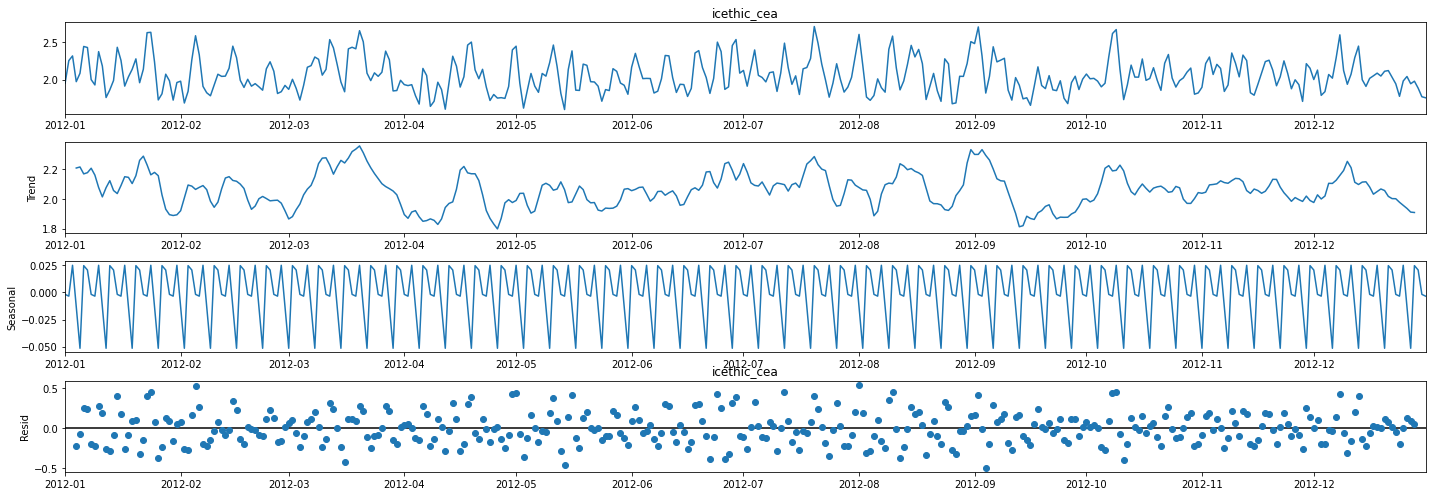

ADF Statistic: -4.406
p-value: 0.0
Series is Stationary
None


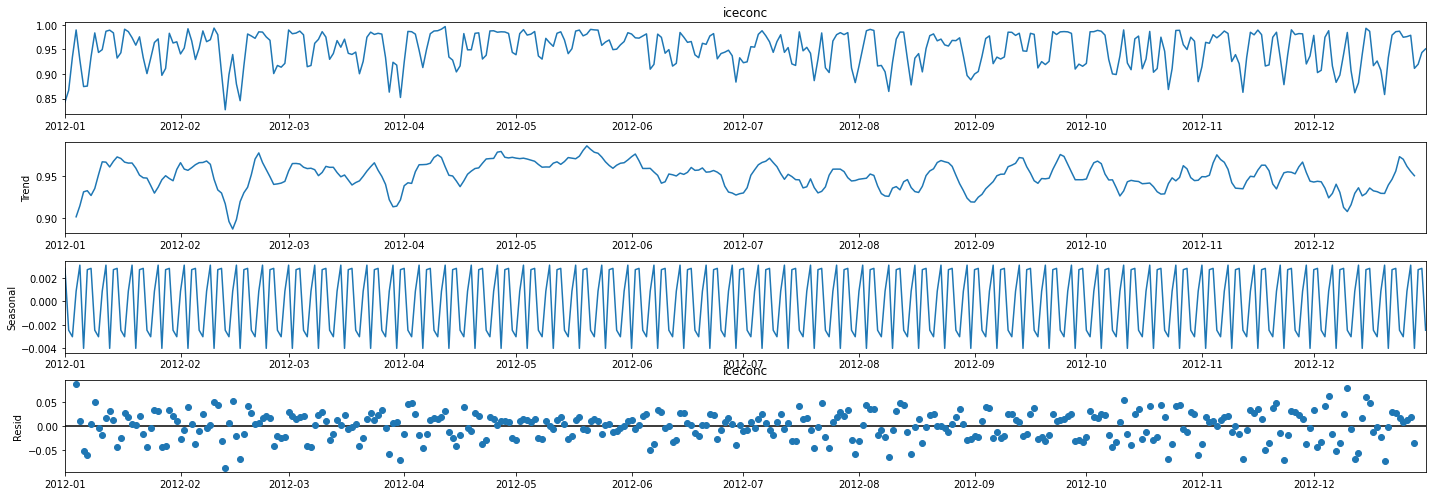

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


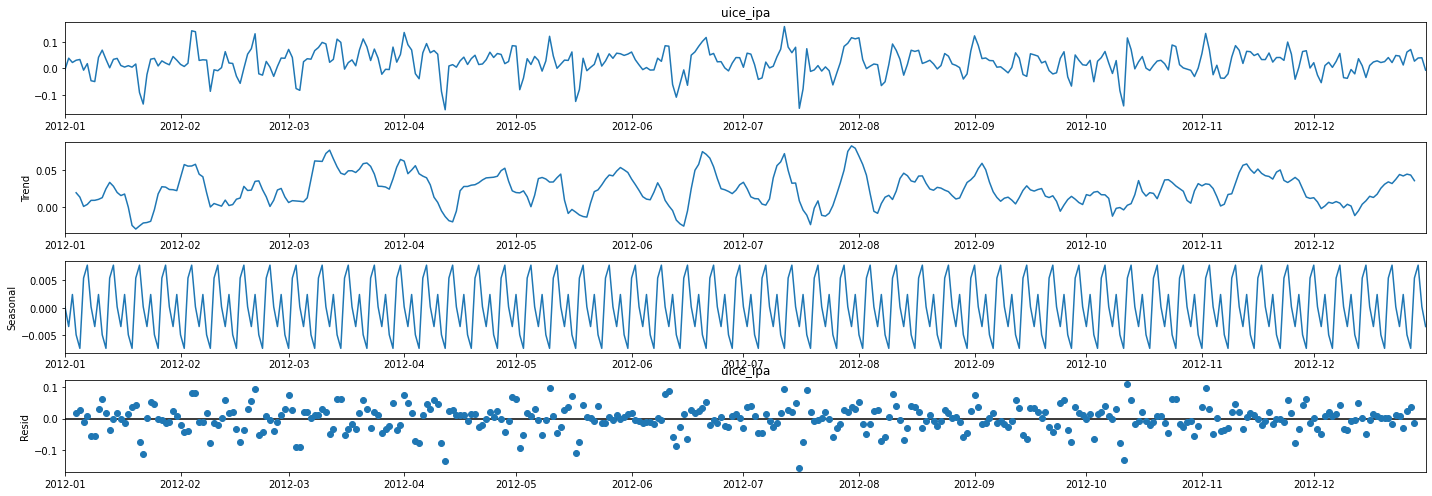

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


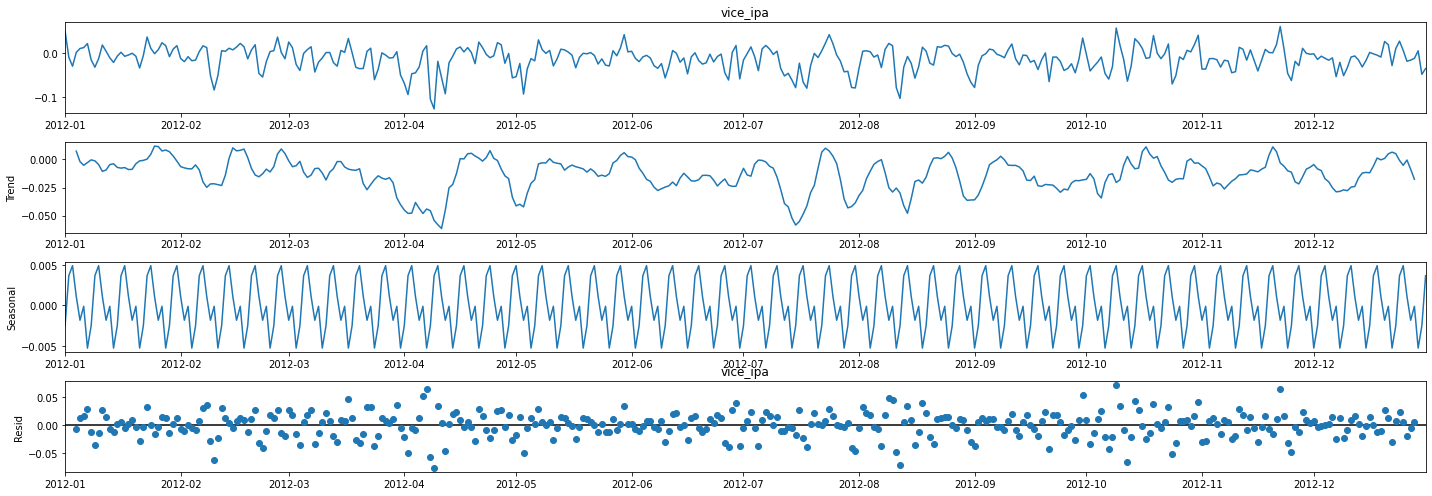

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


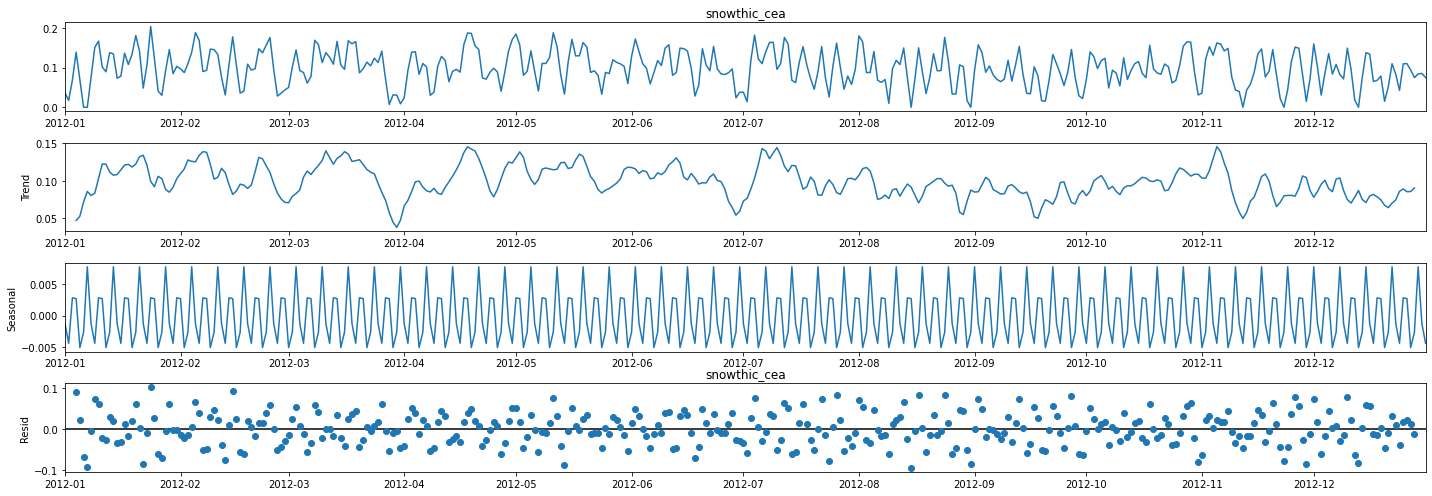

In [221]:
one_year = df_daily.iloc[:366, :].copy()
for column in one_year.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(one_year[column]).plot()
    plt.title(column)
    plt.show()

ADF Statistic: -4.031
p-value: 0.0013
Series is Stationary
None


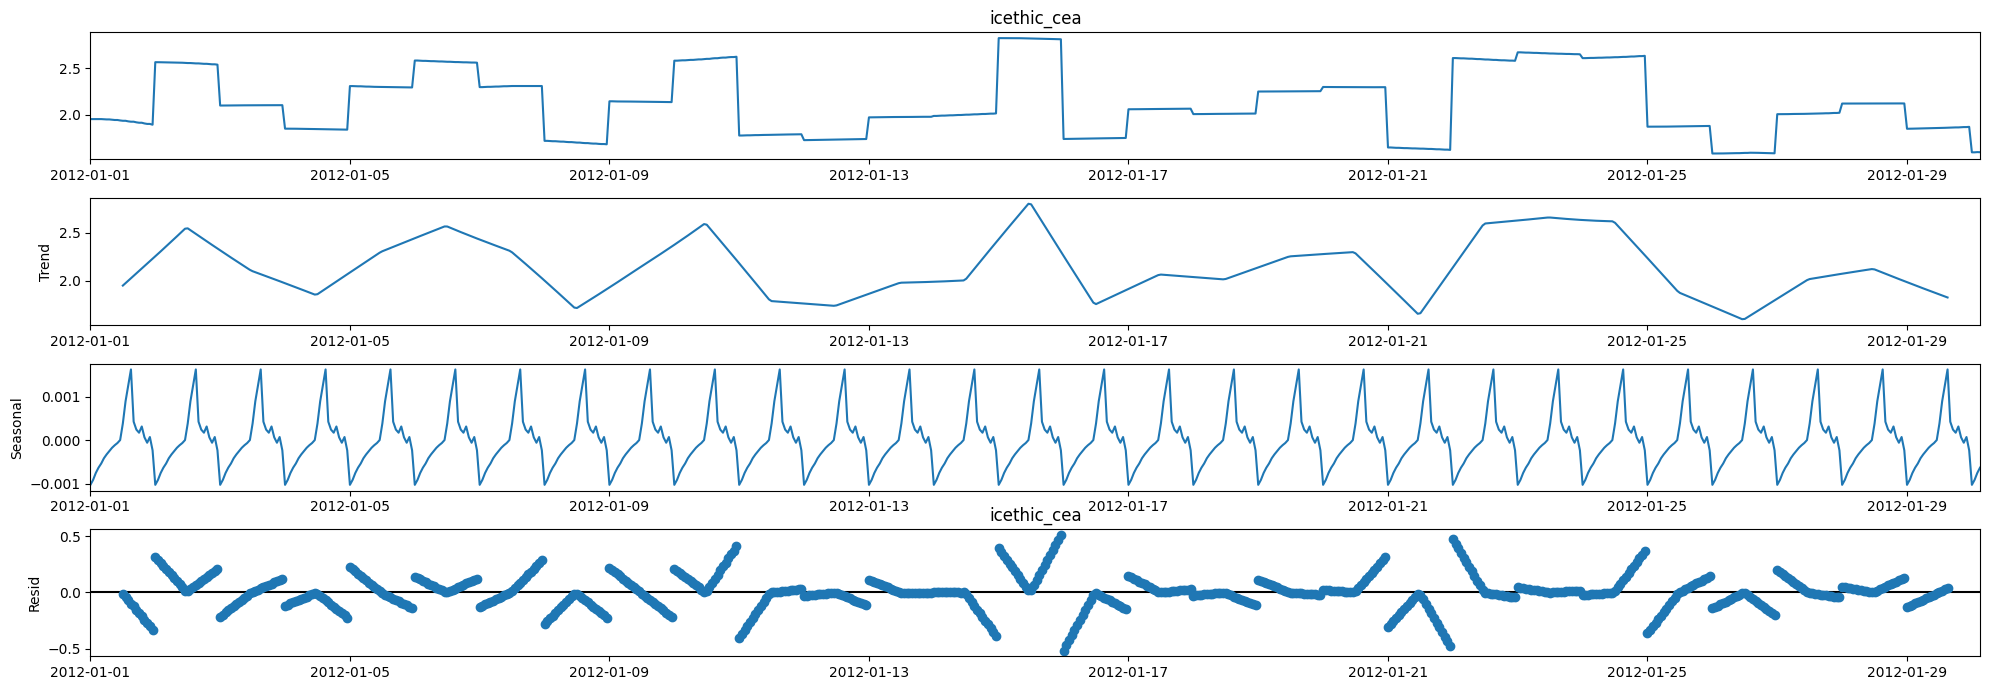

ADF Statistic: -4.406
p-value: 0.0003
Series is Stationary
None


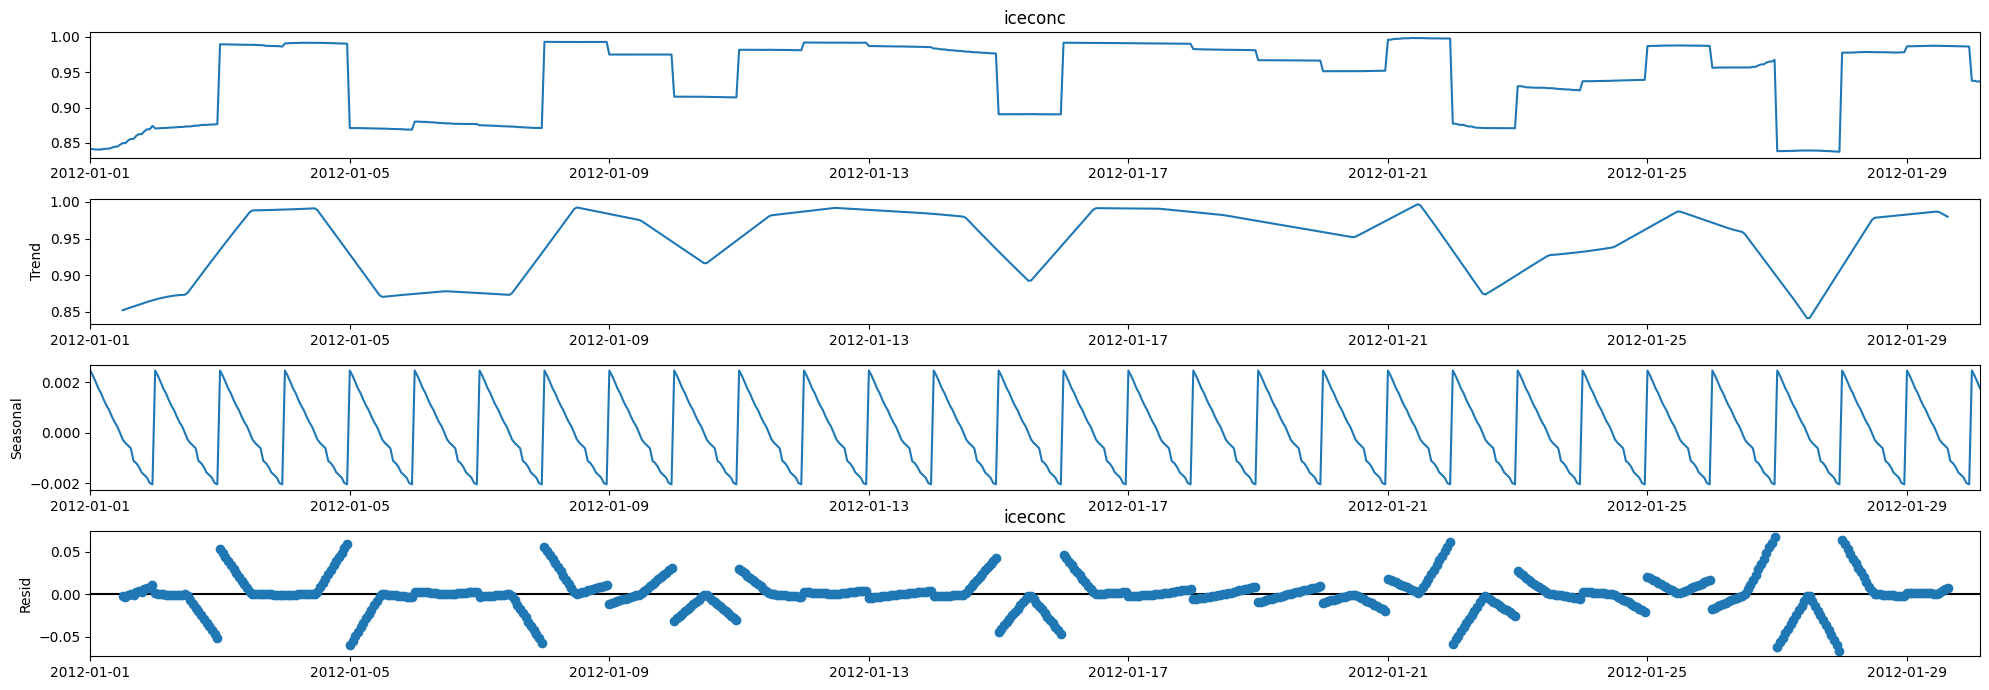

ADF Statistic: -14.467
p-value: 0.0
Series is Stationary
None


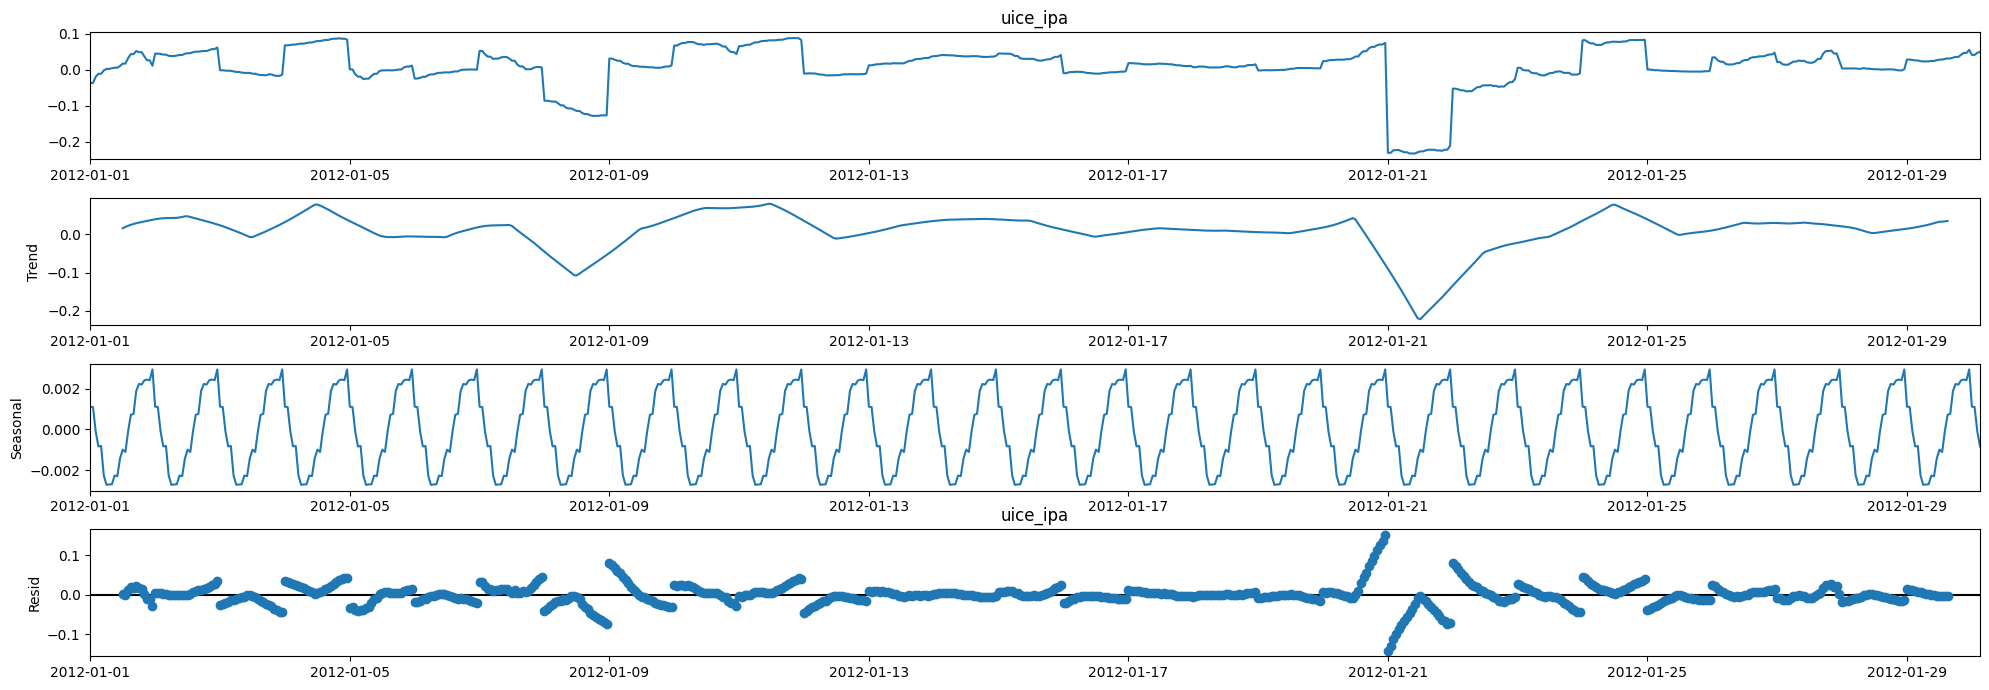

ADF Statistic: -13.453
p-value: 0.0
Series is Stationary
None


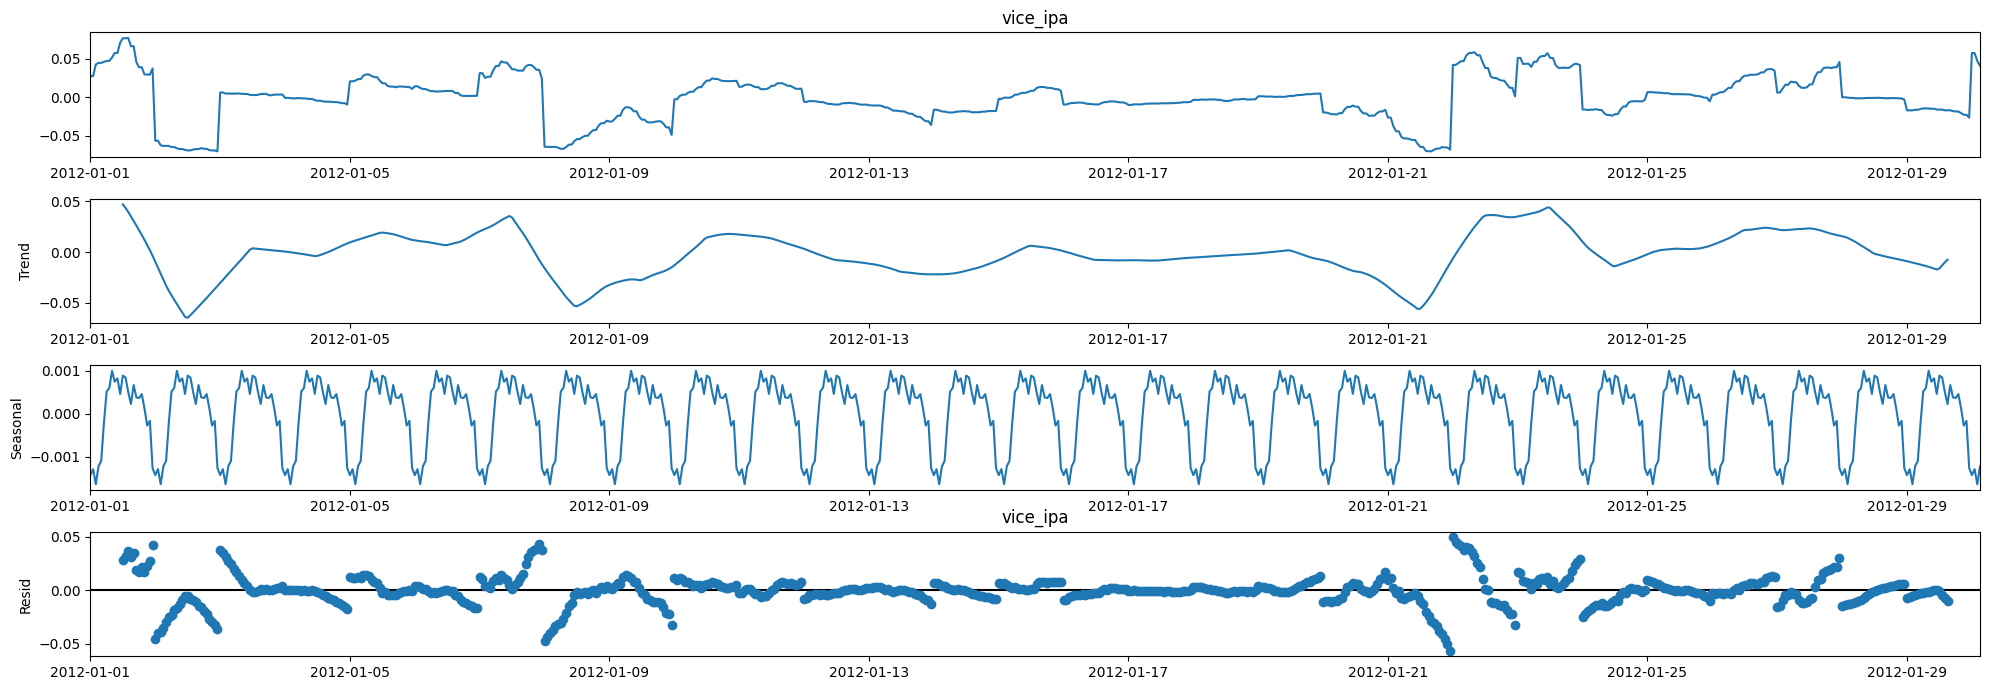

ADF Statistic: -6.016
p-value: 0.0
Series is Stationary
None


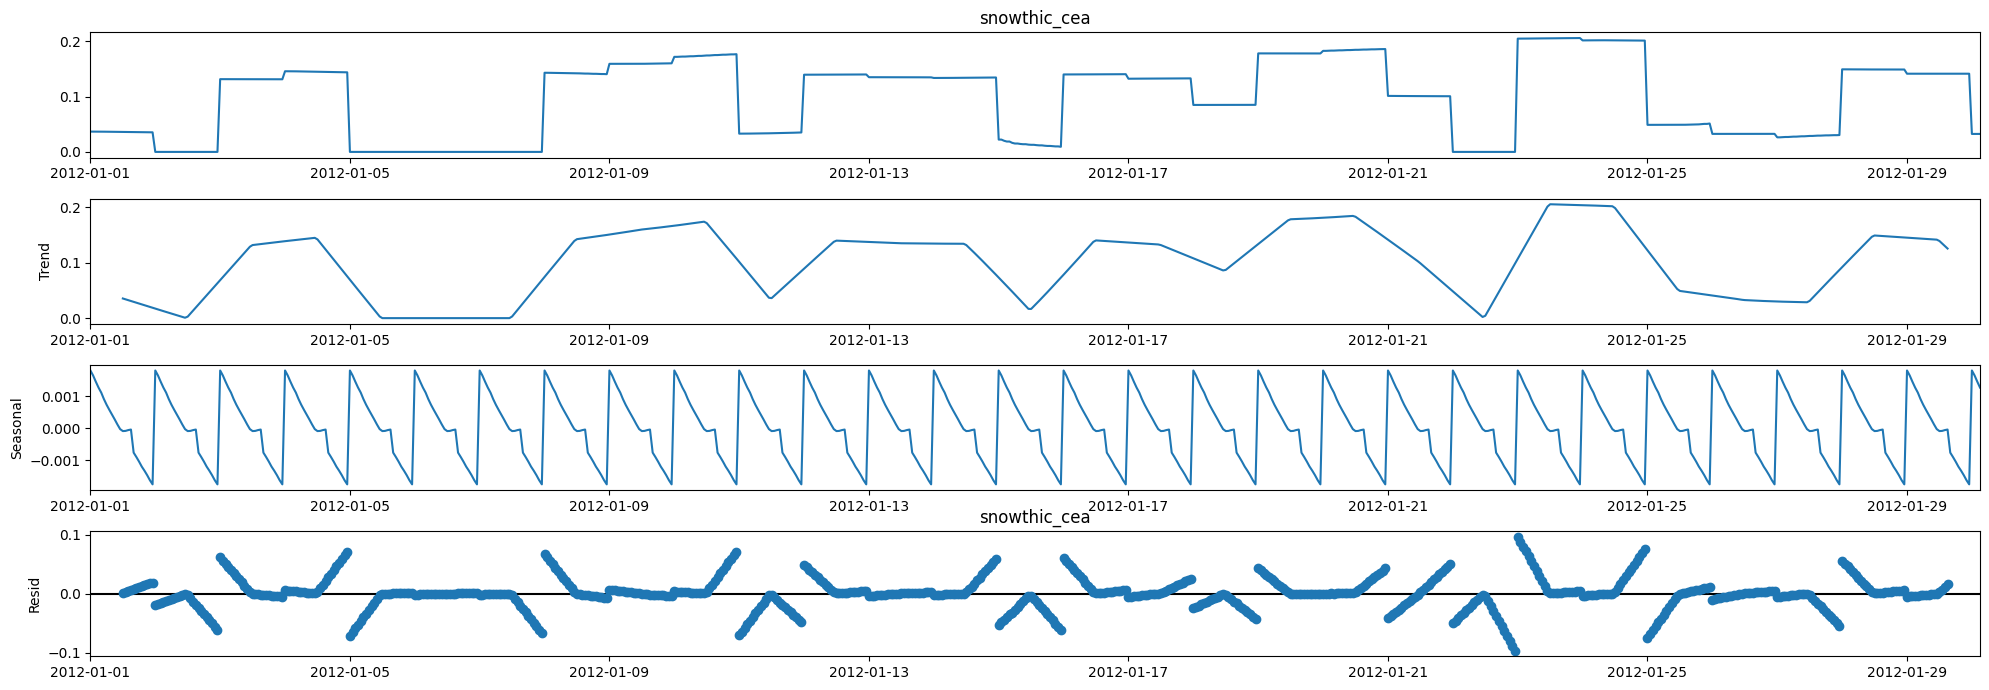

In [29]:
one_month = df[our_columns].iloc[:700, :].copy()
for column in one_month.columns:
    statistics = stat_tests(df_daily[column])
    print(statistics)
    sm.tsa.seasonal_decompose(one_month[column]).plot()
    plt.title(column)
    plt.show()

AIC: 353.770, HQIC: 357.439, BIC: 363.375


<Figure size 432x288 with 0 Axes>

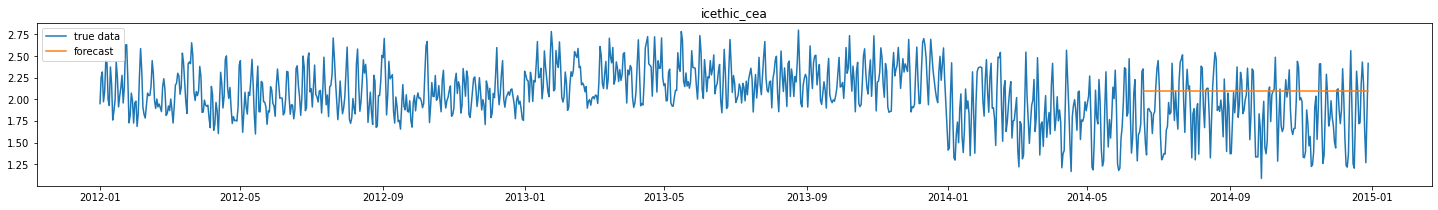

AIC: -3797.485, HQIC: -3793.816, BIC: -3787.880


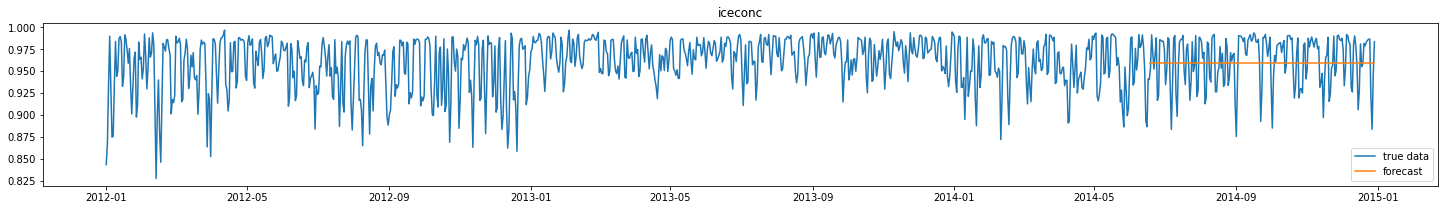

AIC: -3162.548, HQIC: -3158.879, BIC: -3152.944


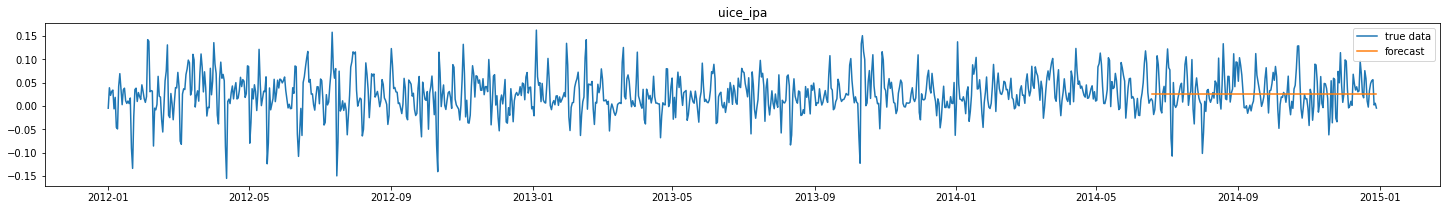

AIC: -4007.159, HQIC: -4003.490, BIC: -3997.555


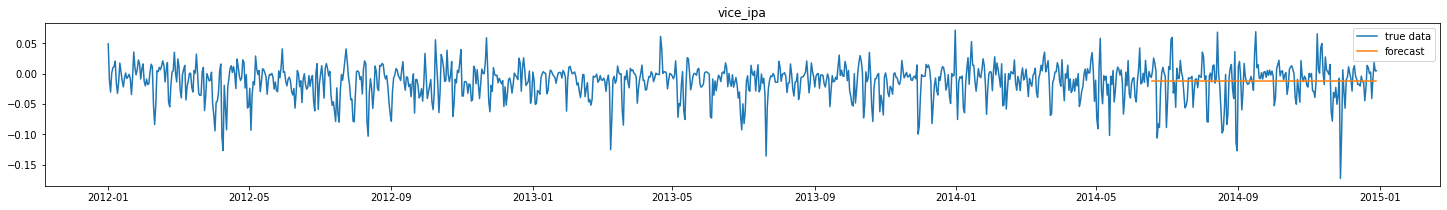

AIC: -2632.795, HQIC: -2629.126, BIC: -2623.190


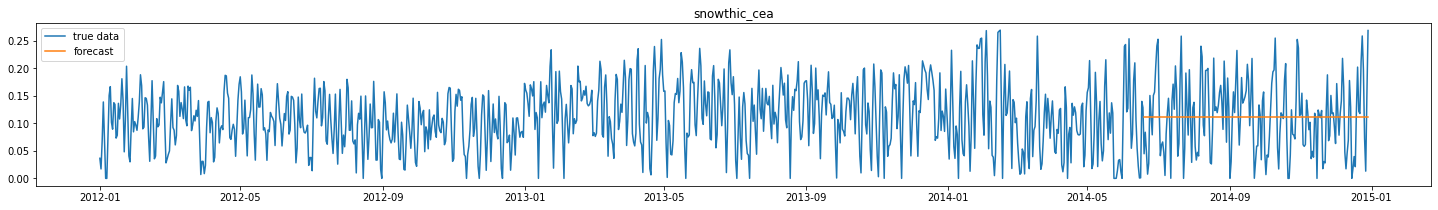

In [ ]:
plt.figure()
for column in df_daily.columns:
    x = df_daily[column][:900]
    y = df_daily.index[900:]
    out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
    res = AutoReg(x, lags = 0).fit()
    print(out.format(res.aic, res.hqic, res.bic))
    predict = res.predict(y[0], y[-1])
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column], label = 'true data')
    plt.plot(predict, label = 'forecast')
    plt.legend()
    plt.title(column)
    plt.show()
    

/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 432x288 with 0 Axes>

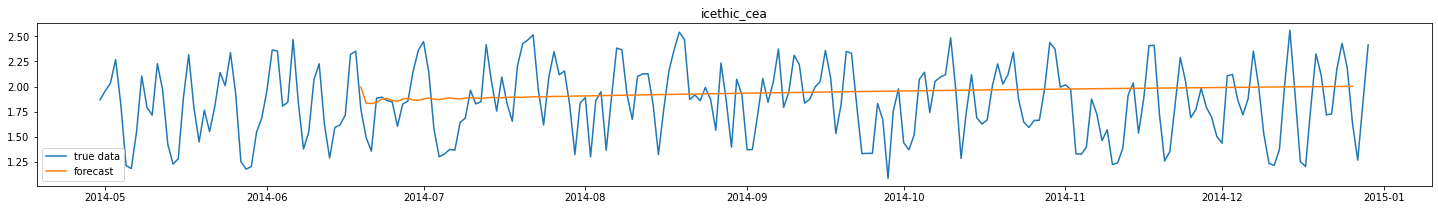

/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


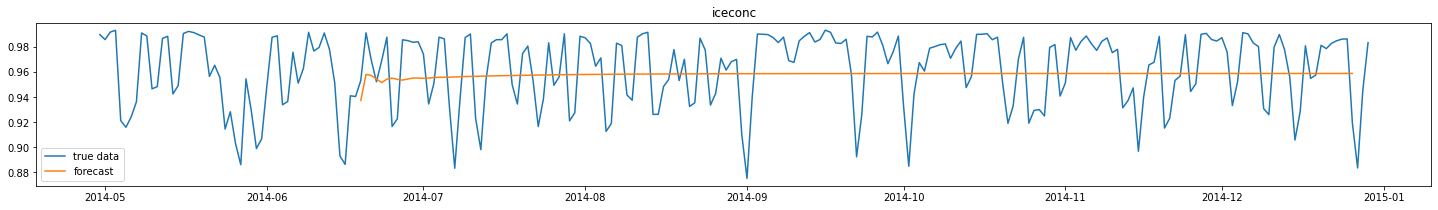

/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


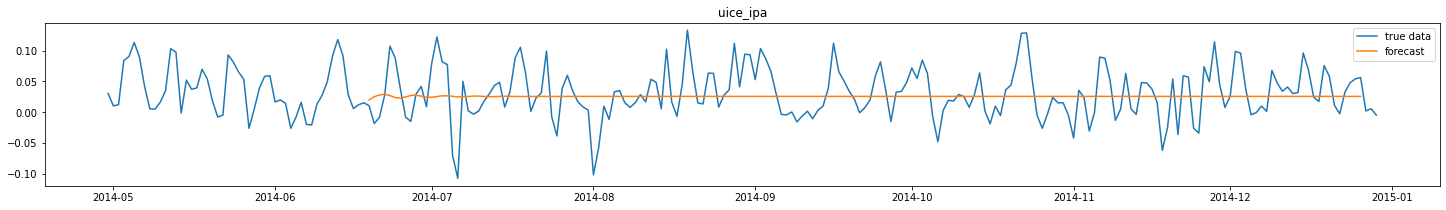

/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


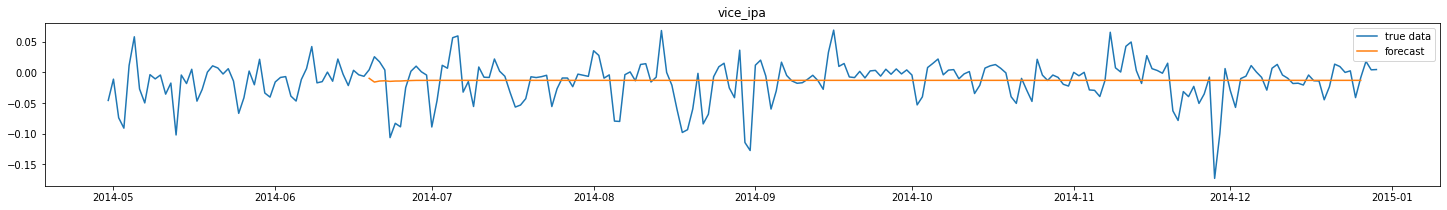

/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/user/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


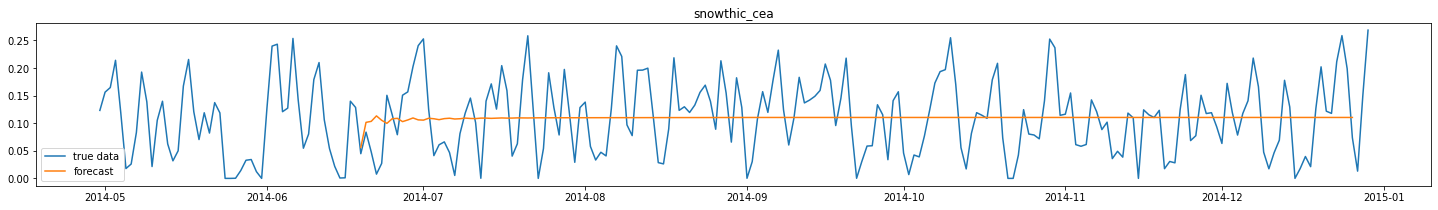

In [6]:
plt.figure()
for column in df_daily.columns:
    x = df_daily[column][:900]
    res = sm.tsa.arima.ARIMA(x, order=(3, 0, 7))
    model_fit = res.fit()
    predict = model_fit.predict(start = len(x), end = len(x)+190)
    plt.subplots(figsize=(25, 3))
    plt.plot(df_daily[column][850:], label = 'true data')
    plt.plot(predict, label = 'forecast')
    plt.legend()
    plt.title(column)
    plt.show()


In [ ]:
def norm_data(data):
    normed = (data.values - np.min(data))/(np.max(data) - np.min(data))
    return pd.Series(normed, index=data.index)


BaseLine RMSE*100 for 30 days: 27.645
BaseLine MAPE for 30 days: 2.595


<Figure size 432x288 with 0 Axes>

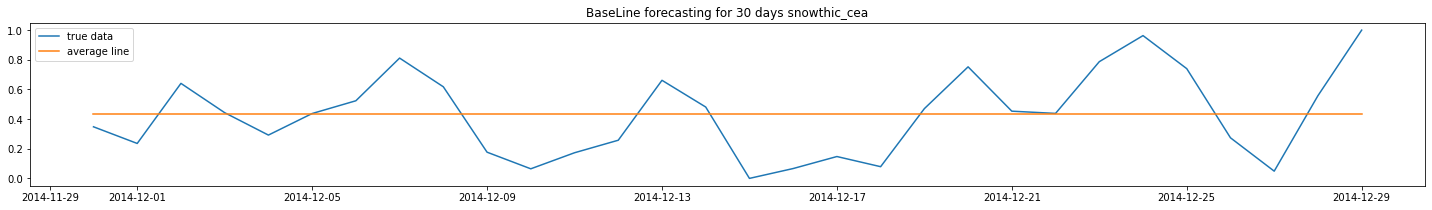

BaseLine RMSE*100 for 90 days: 24.884
BaseLine MAPE for 90 days: 38.609


<Figure size 432x288 with 0 Axes>

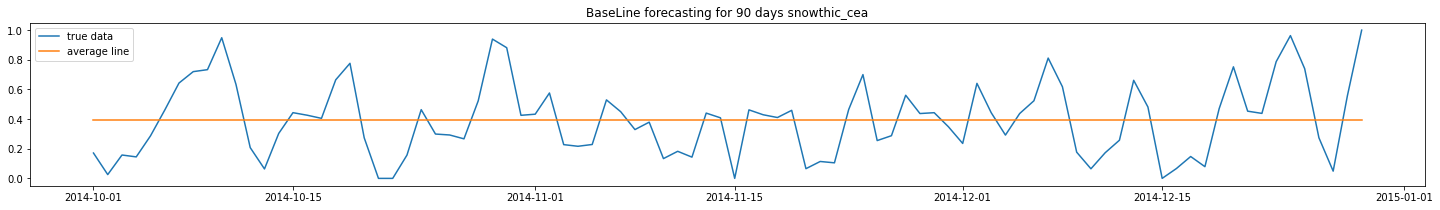

BaseLine RMSE*100 for 180 days: 24.342
BaseLine MAPE for 180 days: 30.375


<Figure size 432x288 with 0 Axes>

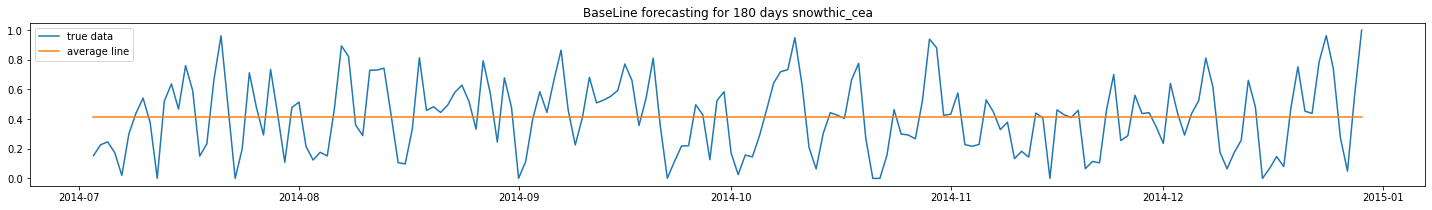

In [93]:
# baseline
print(f'')

for day_val in [30, 90, 180]:

    base_data = norm_data(df_daily['snowthic_cea'][-day_val:])
    base_predict = pd.Series(np.full((len(base_data)), np.mean(base_data)), index=[idx for idx in base_data.index])

    print(f'BaseLine RMSE*100 for {day_val} days: {round(100*mean_squared_error(base_data, base_predict, squared=False), 3)}')
    prep_data = base_data.copy()
    prep_data[prep_data < 0.0001] = 0.01
    print(f'BaseLine MAPE for {day_val} days: {round(mean_absolute_percentage_error(prep_data, base_predict), 3)}')
    
    plt.figure()
    plt.subplots(figsize=(25, 3))
    plt.plot(base_data, label = 'true data')
    plt.plot(base_predict, label = 'average line')
    plt.legend()
    plt.title(f'BaseLine forecasting for {day_val} days snowthic_cea')
    plt.show()


In [ ]:
parameters = product(range(0,8), repeat=3)
parameters_list = list(parameters)
print (u"Models to analyse:", len(parameters_list))

results_ARIMA = []
best_aic_ARIMA = 10000.0

data = norm_data(df_daily['snowthic_cea'])
warnings.filterwarnings('ignore')
for param in parameters_list:
    
    #try except for the case of wrong parameters
    try:
        model_ARIMA=sm.tsa.arima.ARIMA(data, order=param).fit()
        
    #print wrong parameters and go on
    # AIC criteria: 
    except ValueError:
            continue
    aic = model_ARIMA.aic

    # save best model, aic, parameters
    if (abs(aic) < abs(best_aic_ARIMA)):
        best_model_ARIMA = model_ARIMA
        best_aic_ARIMA = aic
        best_param_ARIMA = param
        print(best_aic_ARIMA)
    results_ARIMA.append([param, model_ARIMA.aic])
    
print(f'AIC value: {best_model_ARIMA.aic}')

Found the best PDQ: [(2, 2, 0)]
AIC value: 16.648495384568577


ARIMA RMSE*100 for 30 days: 15.352
ARIMA MAPE for 30 days: 0.38


<Figure size 432x288 with 0 Axes>

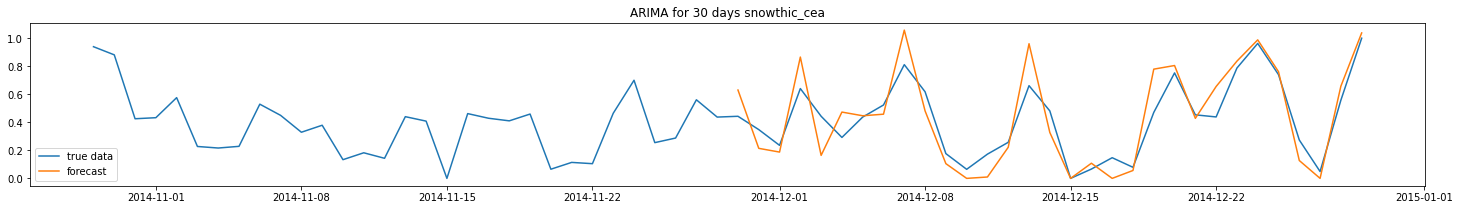

ARIMA RMSE*100 for 90 days: 16.094
ARIMA MAPE for 90 days: 0.421


<Figure size 432x288 with 0 Axes>

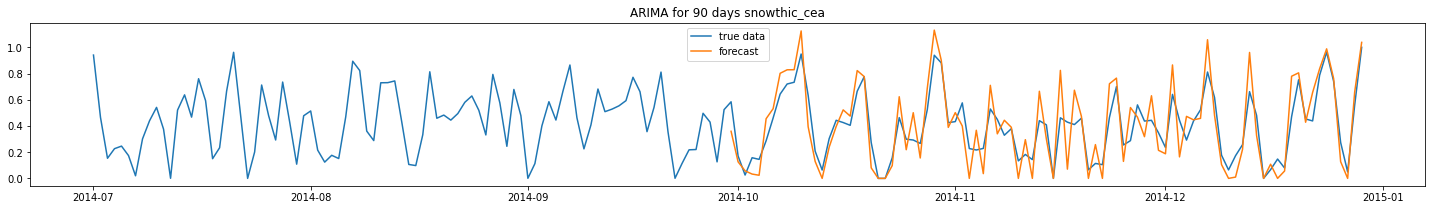

ARIMA RMSE*100 for 180 days: 16.305
ARIMA MAPE for 180 days: 0.608


<Figure size 432x288 with 0 Axes>

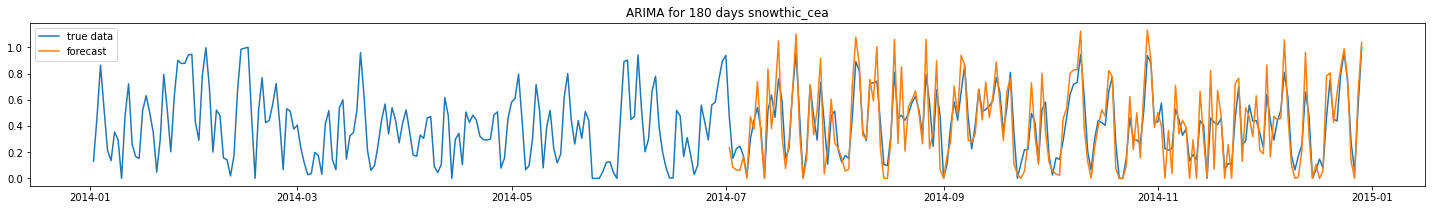

In [92]:
result_ARIMA = pd.DataFrame(results_ARIMA)
result_ARIMA.columns = ['parameters', 'aic']
result_ARIMA['abs_aic'] = abs(result_ARIMA['aic'])
best_pdq = result_ARIMA.sort_values(by = 'abs_aic', ascending=True)['parameters'].head(1).values
print(f'Found the best PDQ: {best_pdq}')
print(f'AIC value: {best_model_ARIMA.aic}\n\n')


for day_val in [30, 90, 180]:

    idx = day_val+1
    predict = best_model_ARIMA.predict(start = len(data)-day_val, end = len(data))
    print(f'ARIMA RMSE*100 for {day_val} days: {round(100*mean_squared_error(data[-idx:], predict, squared=False), 3)}')
    prep_data = data[-idx:]
    prep_data[prep_data < 0.000001] = 0.0001
    predict[predict< 0.000001] = 0.0001
    print(f'ARIMA MAPE for {day_val} days: {round(mean_absolute_percentage_error(prep_data, predict), 3)}')



    predict_toviz = pd.Series(predict, index=[i for i in df_daily['snowthic_cea'][-idx:].index])
    plt.figure()
    plt.subplots(figsize=(25, 3))
    plt.plot(norm_data(df_daily['snowthic_cea'][-idx*2:]), label = 'true data')
    plt.plot(predict_toviz, label = 'forecast')
    plt.legend()
    plt.title(f'ARIMA for {day_val} days snowthic_cea')
    plt.show()

In [ ]:
ps = range(5)
d=[0,1,3]
qs = range(5)
Ps = range(2)
Qs= range(2)
season = [7,14,30]

parameters = product(ps, qs, d, Ps, Qs)
parameters_list = list(parameters)
print (u"Models to analyse by AIC:", len(parameters_list)*len(season))


results_SARIMA = []
best_aic_SARIMA = float("inf")

# ignore warnings 
warnings.filterwarnings('ignore')
count = 0
while abs(best_aic_SARIMA) >= 17:
    for param in parameters_list[75:]:
        for s in season:
            #try except for the case of wrong parameters
            try:
                model_SARIMA=sm.tsa.statespace.SARIMAX(norm_data(df_daily['snowthic_cea']), order=(param[0], param[2], param[1]), 
                                                seasonal_order=(param[3], param[2], param[4], s)).fit(disp=-1)
                
            #print wrong parameters and go on
            # AIC criteria: 
            except ValueError:
                    continue
            aic = model_SARIMA.aic

            # save best model, aic, parameters
            if (abs(aic) < abs(best_aic_SARIMA)):
                best_model_SARIMA = model_SARIMA
                best_aic_SARIMA = aic
                best_param_SARIMA = param
                print(best_aic_SARIMA)
            results_SARIMA.append([best_param_SARIMA, best_model_SARIMA.aic])
            count+=1
            if count%50==0:
                print('count:', count)    
print(f'AIC value: {best_model_SARIMA.aic}')

Found the best PDQ: [(1, 1, 1, 1, 0)]
AIC value: -57.7422187520869


SARIMA RMSE*100 for 30 days: 20.232
SARIMA MAPE for 30 days: 105.933


<Figure size 432x288 with 0 Axes>

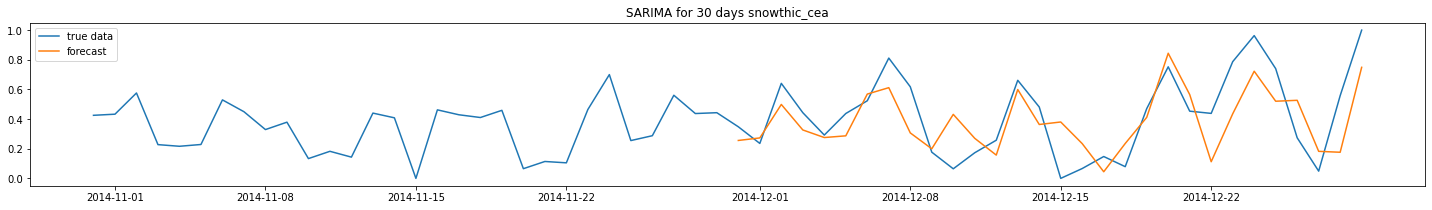

SARIMA RMSE*100 for 90 days: 21.61
SARIMA MAPE for 90 days: 145.463


<Figure size 432x288 with 0 Axes>

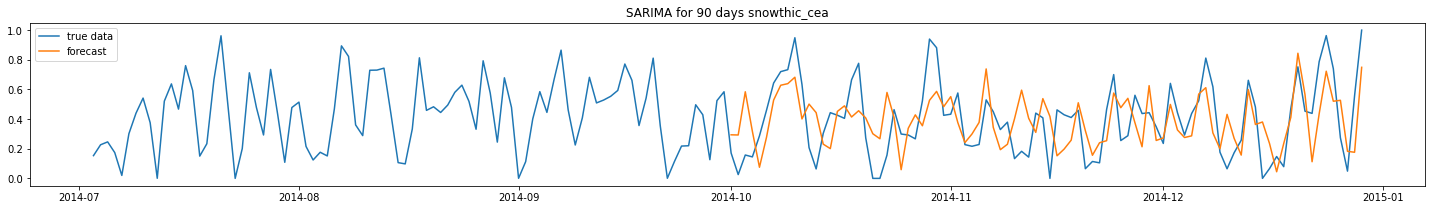

SARIMA RMSE*100 for 180 days: 20.664
SARIMA MAPE for 180 days: 88.309


<Figure size 432x288 with 0 Axes>

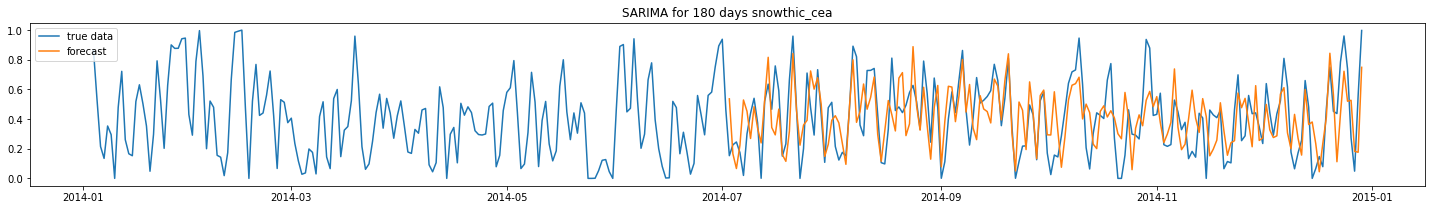

In [94]:
result_SARIMA = pd.DataFrame(results_SARIMA)
result_SARIMA.columns = ['parameters', 'aic']
result_SARIMA['abs_aic'] = abs(result_SARIMA['aic'])
best_pdqs = result_SARIMA.sort_values(by = 'abs_aic', ascending=True)['parameters'].head(1).values
print(f'Found the best PDQ: {best_pdqs}')
print(f'AIC value: {best_model_SARIMA.aic}\n\n')


data = norm_data(df_daily['snowthic_cea'])

for day_val in [30, 90, 180]:

    idx = day_val
    predict = best_model_SARIMA.predict(start = len(data)-day_val, end = len(data))
    predict = pd.Series(predict[1:].values, index = predict.index[:-1])
    print(f'SARIMA RMSE*100 for {day_val} days: {round(100*mean_squared_error(data[-idx:], predict, squared=False), 3)}')
    prep_data = data[-idx:]
    prep_data[prep_data < 0.0001] = 0.0001
    predict[predict< 0.0001] = 0.0001
    print(f'SARIMA MAPE for {day_val} days: {round(mean_absolute_percentage_error(prep_data, predict), 3)}')


    predict_toviz = pd.Series(predict, index=[i for i in df_daily['snowthic_cea'][-idx:].index])
    plt.figure()
    plt.subplots(figsize=(25, 3))
    plt.plot(norm_data(df_daily['snowthic_cea'][-idx*2:]), label = 'true data')
    plt.plot(predict_toviz, label = 'forecast')
    plt.legend()
    plt.title(f'SARIMA for {day_val} days snowthic_cea')
    plt.show()